In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder 





In [3]:
iri = pd.read_csv("Iris.csv")
iri

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iri.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iri["Species"].unique()
#3_classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

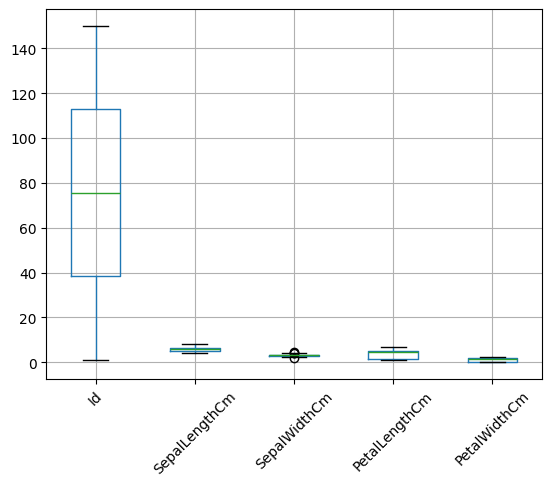

In [7]:
iri.boxplot()
plt.xticks(rotation=45)
plt.show()

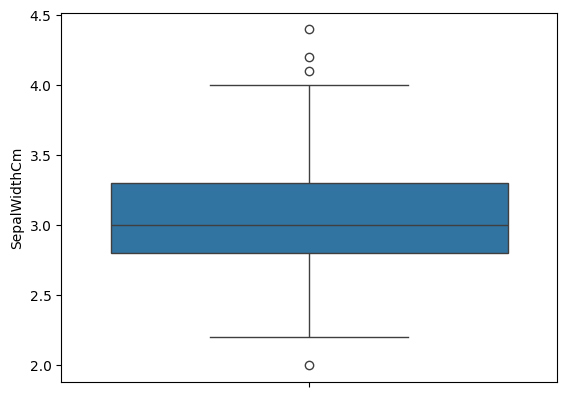

In [8]:
sns.boxplot(y="SepalWidthCm", data=iri)
plt.show()

In [9]:
X_col = iri["SepalWidthCm"].values.reshape(-1,1)
X_col
lof = LocalOutlierFactor()
lof.fit_predict(iri["SepalWidthCm"].values.reshape(-1,1))



c:\Program Files\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


array([ 1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

In [10]:
num_col = iri.select_dtypes(include=['float64','int64'])
num_col


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [11]:
iri

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
enc = LabelEncoder()
iri['Species enc'] = enc.fit_transform(iri['Species'])
iri = iri.drop(columns=["Species"])
iri


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species enc
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [24]:
iri["Species enc"].unique()

array([0, 1, 2])

In [13]:
X = iri.drop(columns=["Species enc"])
y = iri["Species enc"]



In [14]:
iri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species enc    150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
sts = StandardScaler()
scaled = sts.fit_transform(X_train)
scaled



array([[ 0.07890874, -0.4134164 , -1.46440146, -0.10014569, -0.32149987],
       [ 1.32052747,  0.55122187, -0.49582097,  0.71771076,  0.35364985],
       [ 1.41603661,  0.67180165,  0.2306144 ,  0.95138404,  0.75873969],
       [-0.06435496,  0.91296121, -0.01153072,  0.30878254,  0.21861991],
       [ 0.74747267,  1.63643991,  1.44134002,  1.30189395,  1.7039493 ],
       [ 0.43706799, -0.17225683, -0.25367584,  0.1919459 ,  0.08358997],
       [ 0.65196354,  2.11875905, -0.01153072,  1.59398554,  1.16382952],
       [-0.27925051, -0.29283662, -0.01153072,  0.36720086,  0.35364985],
       [-1.85515122, -0.89573553,  1.19919489, -1.443767  , -1.40173942],
       [ 1.05787735,  2.23933883, -0.49582097,  1.65240385,  1.02879957],
       [-0.25537323, -0.05167705, -0.73796609,  0.13352758, -0.32149987],
       [-1.18658728, -0.77515575,  0.95704977, -1.443767  , -1.40173942],
       [-0.90005988, -1.01631531,  1.19919489, -1.50218532, -1.26670948],
       [-0.80455075, -0.89573553,  1.9

In [17]:
""" knn = KNeighborsClassifier(n_neighbors=10)
model = knn.fit(X_train,y_train)
model """

' knn = KNeighborsClassifier(n_neighbors=10)\nmodel = knn.fit(X_train,y_train)\nmodel '

In [18]:
""" y_pred = model.predict(X_test) """

' y_pred = model.predict(X_test) '

In [19]:
""" cm = confusion_matrix(y_test,y_pred)
print(cm)  """

' cm = confusion_matrix(y_test,y_pred)\nprint(cm)  '

In [20]:
""" cl = classification_report(y_test,y_pred)
print(cl) """

' cl = classification_report(y_test,y_pred)\nprint(cl) '

In [21]:
log = LogisticRegression()
ml = log.fit(X_train, y_train)


c:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
y_pred = log.predict(X_test)


In [23]:
mse = mean_squared_error(y_test,y_pred)
print(mse)
cr = classification_report(y_test,y_pred)
print(cr)

0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

